<a href="https://colab.research.google.com/github/Prakhyasingh/BIG-DATA/blob/main/ALY6110_Module_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=37a353dbe7f81fbb6cc1d9759862f811608d7eab4a80e0357b860cd32f91e05c
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
from google.colab import files
uploaded = files.upload()


Saving BostonHousing.csv to BostonHousing.csv


In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col,floor, avg, count, stddev, min, max, expr, round as round_col
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Start a Spark session
spark = SparkSession.builder.appName("BostonHousingLab1").getOrCreate()

In [4]:
#1. Read the given CSV file
file_path = "BostonHousing.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

In [23]:
# 2. Show the first 5 elements of Boston dataset
df.show(5)

+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+-----+
|crim|  zn|indus|chas| nox|  rm| age| dis|rad|tax|ptratio|lstat|medv|Age10|
+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+-----+
|0.01|18.0| 2.31|   0|0.54|6.58|65.2|4.09|  1|296|   15.3| 4.98|24.0|71.72|
|0.03| 0.0| 7.07|   0|0.47|6.42|78.9|4.97|  2|242|   17.8| 9.14|21.6|86.79|
|0.03| 0.0| 7.07|   0|0.47|7.19|61.1|4.97|  2|242|   17.8| 4.03|34.7|67.21|
|0.03| 0.0| 2.18|   0|0.46| 7.0|45.8|6.06|  3|222|   18.7| 2.94|33.4|50.38|
|0.07| 0.0| 2.18|   0|0.46|7.15|54.2|6.06|  3|222|   18.7| 5.33|36.2|59.62|
+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+-----+
only showing top 5 rows



In [6]:
# 3. Count number of observations in the Boston dataset
df.count()

506

In [7]:
# 4. Show the Schema of your dataset
df.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [8]:
# 5. Drop the column "b" from Boston dataset
df = df.drop("b")

In [9]:
#6. Round all of the numerical columns into two decimal place
numeric_cols = [field.name for field in df.schema.fields if field.dataType != 'StringType']
df = df.select([round_col(col(c), 2).alias(c) if c in numeric_cols else col(c) for c in df.columns])
df.show(5)

+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+
|crim|  zn|indus|chas| nox|  rm| age| dis|rad|tax|ptratio|lstat|medv|
+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+
|0.01|18.0| 2.31|   0|0.54|6.58|65.2|4.09|  1|296|   15.3| 4.98|24.0|
|0.03| 0.0| 7.07|   0|0.47|6.42|78.9|4.97|  2|242|   17.8| 9.14|21.6|
|0.03| 0.0| 7.07|   0|0.47|7.19|61.1|4.97|  2|242|   17.8| 4.03|34.7|
|0.03| 0.0| 2.18|   0|0.46| 7.0|45.8|6.06|  3|222|   18.7| 2.94|33.4|
|0.07| 0.0| 2.18|   0|0.46|7.15|54.2|6.06|  3|222|   18.7| 5.33|36.2|
+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+
only showing top 5 rows



In [10]:
# 7. Create a new column (Age10) with 10% increase of 'age' column
df = df.withColumn("Age10", round_col(col("age") * 1.10, 2))
df.show(5)

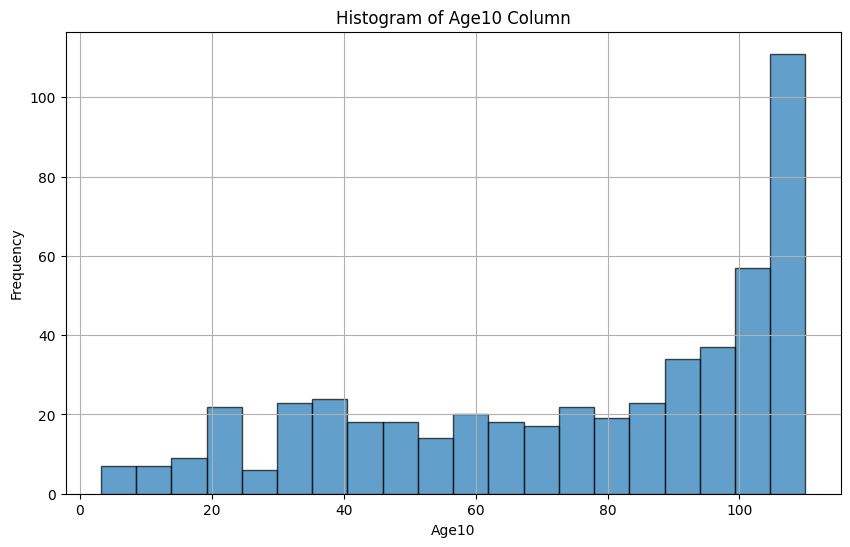

In [11]:
# 8. Plot histogram of Age10 column on a 2D Plot
age10_data = df.select("Age10").toPandas()
plt.figure(figsize=(10, 6))
plt.hist(age10_data["Age10"], bins=20, edgecolor='k', alpha=0.7)
plt.title("Histogram of Age10 Column")
plt.xlabel("Age10")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [12]:
# 9. Provide Summary Statistics of all columns
summary_stats = df.describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|                zn|             indus|              chas|               nox|                rm|               age|               dis|              rad|               tax|           ptratio|             lstat|              medv|             Age10|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|               506|               506|               506|               506|              

In [13]:
# 10. Convert Spark Dataframe to Pandas Dataframe
pandas_df = df.toPandas()


In [14]:
# 11. Show the last 5 rows of Pandas Dataframe
print(pandas_df.tail())

     crim   zn  indus  chas   nox    rm   age   dis  rad  tax  ptratio  lstat  \
501  0.06  0.0  11.93     0  0.57  6.59  69.1  2.48    1  273     21.0   9.67   
502  0.05  0.0  11.93     0  0.57  6.12  76.7  2.29    1  273     21.0   9.08   
503  0.06  0.0  11.93     0  0.57  6.98  91.0  2.17    1  273     21.0   5.64   
504  0.11  0.0  11.93     0  0.57  6.79  89.3  2.39    1  273     21.0   6.48   
505  0.05  0.0  11.93     0  0.57  6.03  80.8  2.51    1  273     21.0   7.88   

     medv   Age10  
501  22.4   76.01  
502  20.6   84.37  
503  23.9  100.10  
504  22.0   98.23  
505  11.9   88.88  


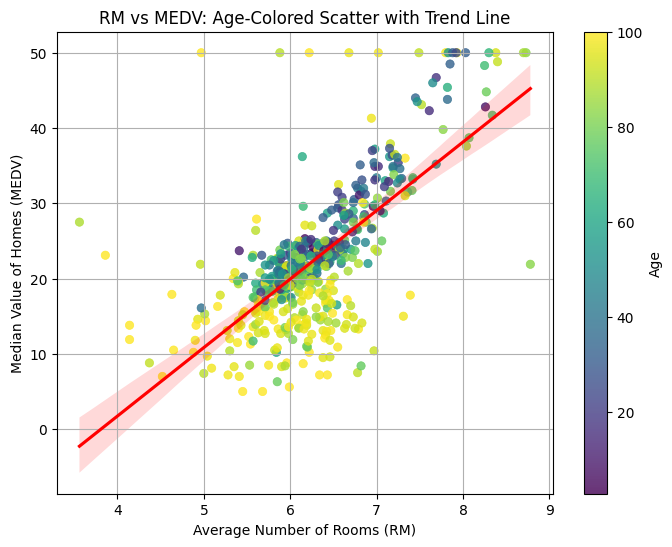

In [16]:
# Additional Exploratory Data Analysis Plots
#Scatter Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pandas_df["rm"], pandas_df["medv"], c=pandas_df["age"], cmap="viridis", alpha=0.8, linewidths=0.5)
plt.colorbar(scatter, label='Age')
sns.regplot(x="rm", y="medv", data=pandas_df, scatter=False, color='red')
plt.title("RM vs MEDV: Age-Colored Scatter with Trend Line")
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("Median Value of Homes (MEDV)")
plt.grid(True)
plt.show()

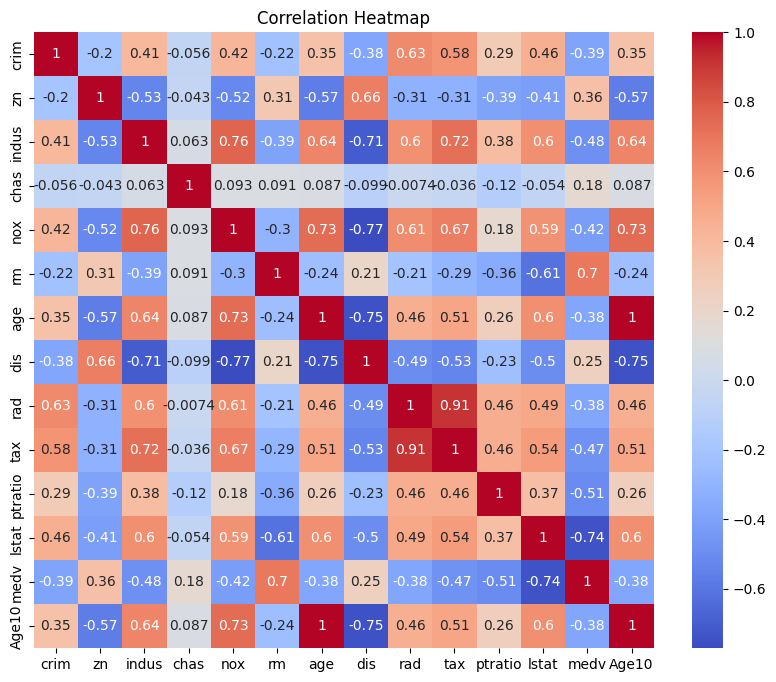

In [17]:
# Drop non-numeric columns if any
numeric_df = pandas_df.select_dtypes(include=[float, int])

# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


<ipython-input-18-9b04e501d490>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="rad", y="medv", data=pandas_df, palette="Set1")


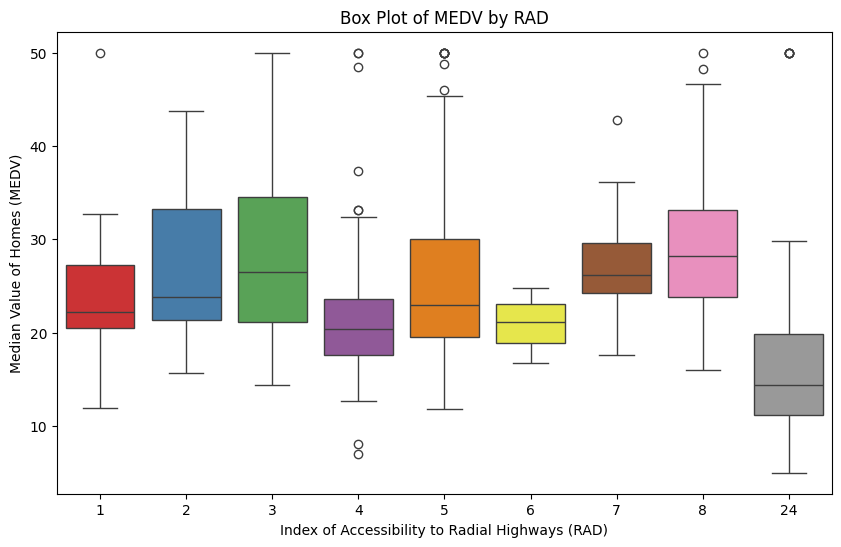

In [18]:
# Box Plot of MEDV by RAD (Index of Accessibility to Radial Highways)
plt.figure(figsize=(10, 6))
sns.boxplot(x="rad", y="medv", data=pandas_df, palette="Set1")
plt.title("Box Plot of MEDV by RAD")
plt.xlabel("Index of Accessibility to Radial Highways (RAD)")
plt.ylabel("Median Value of Homes (MEDV)")
plt.show()

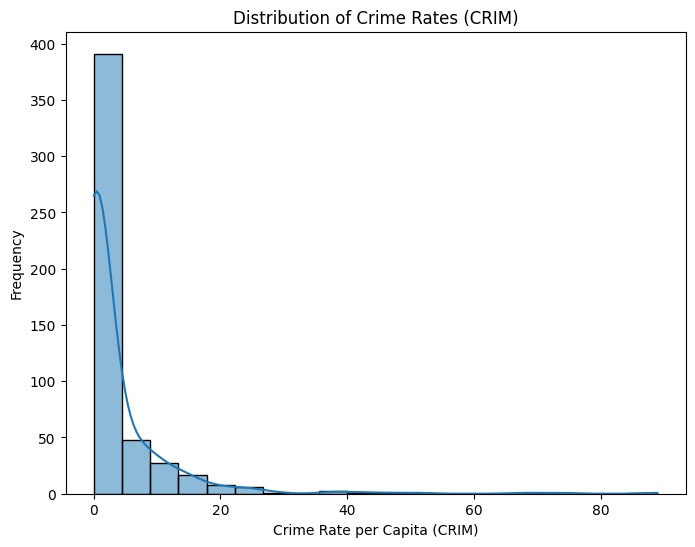

In [19]:
# Distribution of Crime Rates
plt.figure(figsize=(8, 6))
sns.histplot(pandas_df['crim'], bins=20, kde=True)
plt.title("Distribution of Crime Rates (CRIM)")
plt.xlabel("Crime Rate per Capita (CRIM)")
plt.ylabel("Frequency")
plt.show()
